In [1]:
%matplotlib inline
%load_ext fireducks.pandas
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv("./datasets/while-partnered.csv", index_col=0)
df["day"] = pd.to_datetime(df["day"], format="%Y-%m-%d")
df.head()

,day,views,redViews,comments,likes,dislikes,videosAddedToPlaylists,videosRemovedFromPlaylists,shares,estimatedMinutesWatched,...,subscribersGained,subscribersLost,estimatedRevenue,estimatedAdRevenue,grossRevenue,estimatedRedPartnerRevenue,monetizedPlaybacks,playbackBasedCpm,adImpressions,cpm
0,2020-10-12,1204,52,4,23,2,12,1,1,2170,...,6,1,0.613,0.589,1.071,0.023,127,8.433,141,7.596
1,2020-10-13,1139,88,6,21,0,10,4,2,2450,...,10,1,1.650,1.585,2.881,0.065,447,6.445,502,5.739
2,2020-10-14,1276,64,5,38,2,14,5,2,2655,...,6,1,1.399,1.368,2.488,0.031,491,5.067,537,4.633
3,2020-10-15,1230,58,4,21,0,10,4,1,2495,...,11,1,1.554,1.507,2.739,0.047,498,5.500,565,4.848
4,2020-10-16,1274,50,6,29,0,13,7,2,2936,...,9,1,1.482,1.440,2.618,0.042,460,5.691,508,5.154


In [5]:
def polynomial_regresion(data,degree):
    x =data[:,0].reshape(-1,1)
    y =data[:,1]
    features = PolynomialFeatures(degree=degree)
    x_poly = features.fit_transform(x)
    regr = LinearRegression()
    regr.fit(x_poly,y)
    return regr.predict(x_poly)


/home/master/.virtualenvs/Pandas-Carberra-nubz/lib/python3.12/site-packages/fireducks/pandas/generic.py:775: UserWarning: df2 = df1.copy(deep=False) might not work, when changes made in the data values of 'df2' is expected to be reflected in 'df1'. REF: https://fireducks-dev.github.io/docs/user-guide/04-compatibility/#copydeep--false
  warnings.warn(
/home/master/.virtualenvs/Pandas-Carberra-nubz/lib/python3.12/site-packages/fireducks/pandas/generic.py:775: UserWarning: df2 = df1.copy(deep=False) might not work, when changes made in the data values of 'df2' is expected to be reflected in 'df1'. REF: https://fireducks-dev.github.io/docs/user-guide/04-compatibility/#copydeep--false
  warnings.warn(
/tmp/ipykernel_488084/1027872204.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


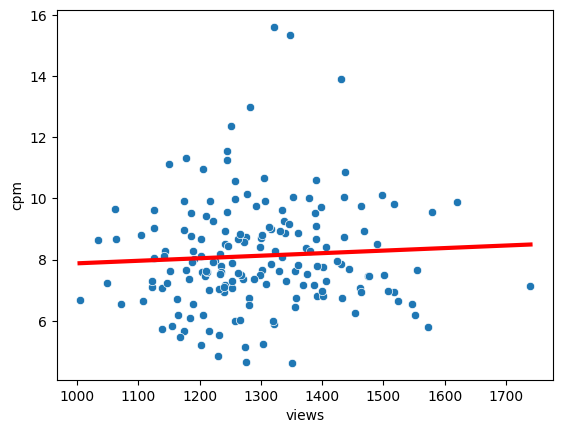

In [8]:
data = df[["views","cpm"]].values
pred = polynomial_regresion(data, 1)
#degree is the degree of the polynomial regression, the smoothness of the curve
fig = plt.figure()
sns.scatterplot(data=df, x="views", y="cpm")
sns.lineplot(x=df["views"], y=pred, color="red",lw=3)
fig.show()

In [9]:
import numpy as np

In [28]:
def polynomial_regression2(x, y, degree):
    """Calculate the polynomial regression of degree degrees between x and y."""
    
    X = np.ones(x.shape)
    X = np.column_stack((X, *(x ** (i + 1) for i in range(degree))))
    return X.dot(np.linalg.solve((XX := X.transpose()).dot(X), XX.dot(y)))

In [30]:
data = df[["views","cpm"]].values
x =data[:,0].reshape(-1,1)
y =data[:,1]
pred = polynomial_regression2(x,y, 3)
pred

array([8.02851771, 7.83722067, 8.20349117, 8.09739476, 8.19936588,
       8.02299922, 7.94296162, 7.55548143, 7.60203977, 8.27657869,
       8.03126599, 7.91627868, 8.28387075, 8.09992894, 7.92521787,
       7.91029552, 8.05833092, 8.07180863, 8.30417441, 8.32205404,
       7.98848654, 8.33310609, 8.28528372, 8.08458912, 8.16241384,
       8.12231725, 8.3337553 , 8.26251992, 8.31838968, 8.25589694,
       8.09439081, 8.10997359, 8.34066159, 8.12475703, 8.18238929,
       7.84954387, 8.15093241, 7.83722067, 8.18845191, 8.06364924,
       8.27507531, 8.12475703, 7.870982  , 8.21159538, 8.1909716 ,
       7.94590067, 7.94590067, 8.23005616, 7.79686358, 8.20143457,
       7.78749451, 7.95176256, 8.10997359, 8.24730308, 8.33757555,
       7.78436759, 8.13441736, 7.97785999, 7.59580043, 7.79374257,
       7.87403027, 8.25078218, 8.04759801, 8.07418693, 8.19519251,
       7.7278337 , 8.30003114, 7.97785999, 8.34173822, 8.17362325,
       8.13680742, 8.18455226, 8.33028253, 7.42083156, 7.50960

/home/master/.virtualenvs/Pandas-Carberra-nubz/lib/python3.12/site-packages/fireducks/pandas/generic.py:775: UserWarning: df2 = df1.copy(deep=False) might not work, when changes made in the data values of 'df2' is expected to be reflected in 'df1'. REF: https://fireducks-dev.github.io/docs/user-guide/04-compatibility/#copydeep--false
  warnings.warn(
/home/master/.virtualenvs/Pandas-Carberra-nubz/lib/python3.12/site-packages/fireducks/pandas/generic.py:775: UserWarning: df2 = df1.copy(deep=False) might not work, when changes made in the data values of 'df2' is expected to be reflected in 'df1'. REF: https://fireducks-dev.github.io/docs/user-guide/04-compatibility/#copydeep--false
  warnings.warn(
/tmp/ipykernel_488084/310026786.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


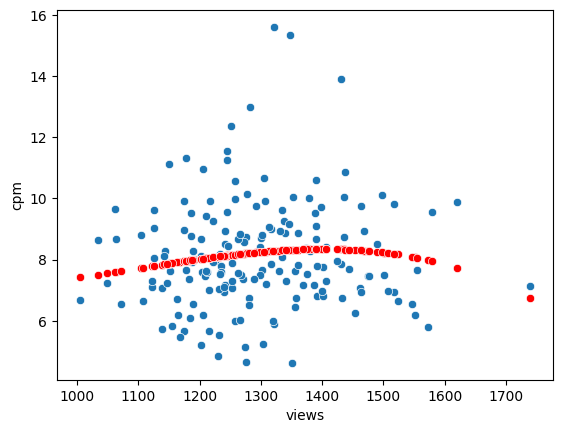

In [32]:
fig = plt.figure()
sns.scatterplot(data=df, x="views", y="cpm")
sns.scatterplot(x=df["views"], y=pred, color="red",)
fig.show()